In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import read_stats, assign_channels, plot_kde
import scipy
from itertools import combinations, product
from tqdm import tqdm
plt.rcParams['figure.figsize'] = [10,10]

In [3]:
channels={1:'CD8a',2:'Foxp3',3:'OVA',4:'CD3',5:'CD86',6:'CellTracker Deep Red',7:'CD4',8:'CD11c',9:'Foxp3'}
DC_1l3_df=assign_channels(read_stats(r'..\240315alumOVAquantification\1l3_Statistics'),channels)
DC_1l3_df['image']='1l3'
DC_1l4_df=assign_channels(read_stats(r'..\240315alumOVAquantification\1l4_Statistics'),channels)
DC_1l4_df['image']='1l4'
DC_1r3_df=assign_channels(read_stats(r'..\240315alumOVAquantification\1r3_Statistics'),channels)
DC_1r3_df['image']='1r3'
DC_2l3_df=assign_channels(read_stats(r'..\240315alumOVAquantification\2l3_Statistics'),channels)
DC_2l3_df['image']='2l3'
DC_2r3_df=assign_channels(read_stats(r'..\240315alumOVAquantification\2r3_Statistics'),channels)
DC_2r3_df['image']='2r3'
DC_2r4_df=assign_channels(read_stats(r'..\240315alumOVAquantification\2r4_Statistics'),channels)
DC_2r4_df['image']='2r4'

g:\analysis\utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[title]=pd.read_csv(dir+r"\\"+file,header=2).iloc[:,0]
g:\analysis\utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[title]=pd.read_csv(dir+r"\\"+file,header=2).iloc[:,0]
g:\analysis\utils.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `n

In [4]:
DC_f3l_df=pd.concat((DC_1l3_df,DC_1l4_df,DC_2l3_df))
DC_crtl_df=pd.concat((DC_1r3_df,DC_2r3_df,DC_2r4_df))

Text(0.5, 0, 'log AF555 signal sum in cell')

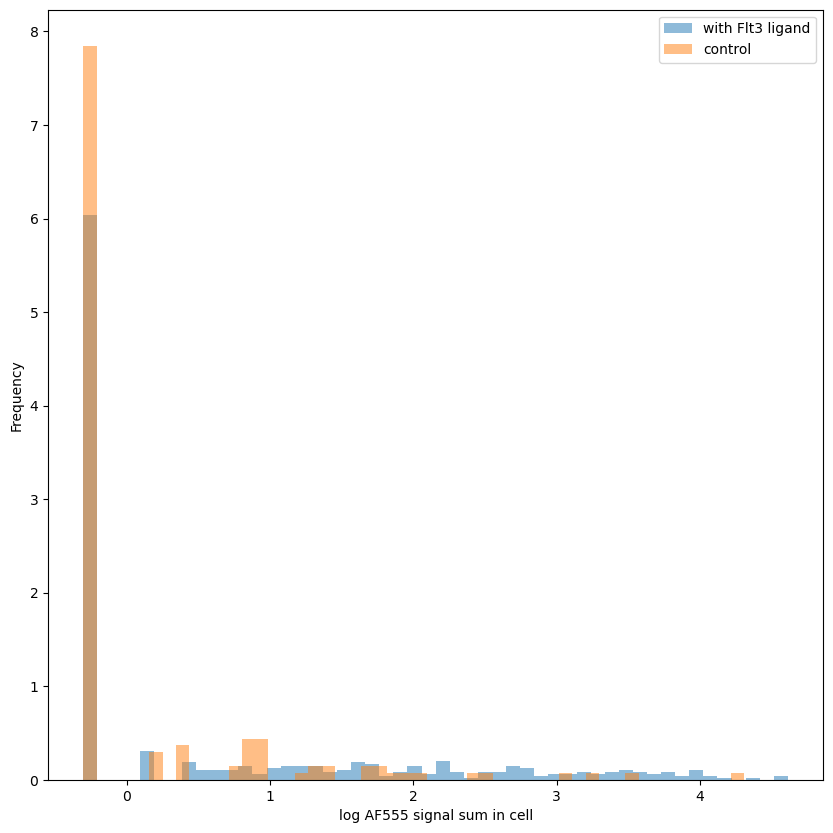

In [6]:
plt.hist(np.log10(DC_f3l_df['Intensity_Sum_OVA']+5e-1),label='with Flt3 ligand',density=True,alpha=0.5,bins=50)
plt.hist(np.log10(DC_crtl_df['Intensity_Sum_OVA']+5e-1),label='control',density=True,alpha=0.5,bins=50)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('log AF555 signal sum in cell')

In [13]:
plt.hist(np.log10(DC_f3l_df['Intensity_Sum_CD86']+5e-1),label='with Flt3 ligand',density=True,alpha=0.5,bins=50)
plt.hist(np.log10(DC_crtl_df['Intensity_Sum_CD86']+5e-1),label='control',density=True,alpha=0.5,bins=50)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('log CD86 signal sum in cell')

KeyError: 'Intensity_Sum_CD86'

In [12]:
thresh=2
print(np.sum(np.int16(np.log10(DC_crtl_df['Intensity_Sum_OVA']+5e-1)>thresh))/len(DC_crtl_df),np.sum(np.int16(np.log10(DC_f3l_df['Intensity_Sum_OVA']+5e-1)>thresh))/len(DC_f3l_df))

0.0472972972972973 0.1790744466800805


AttributeError: 'AxesSubplot' object has no attribute 'ecdf'

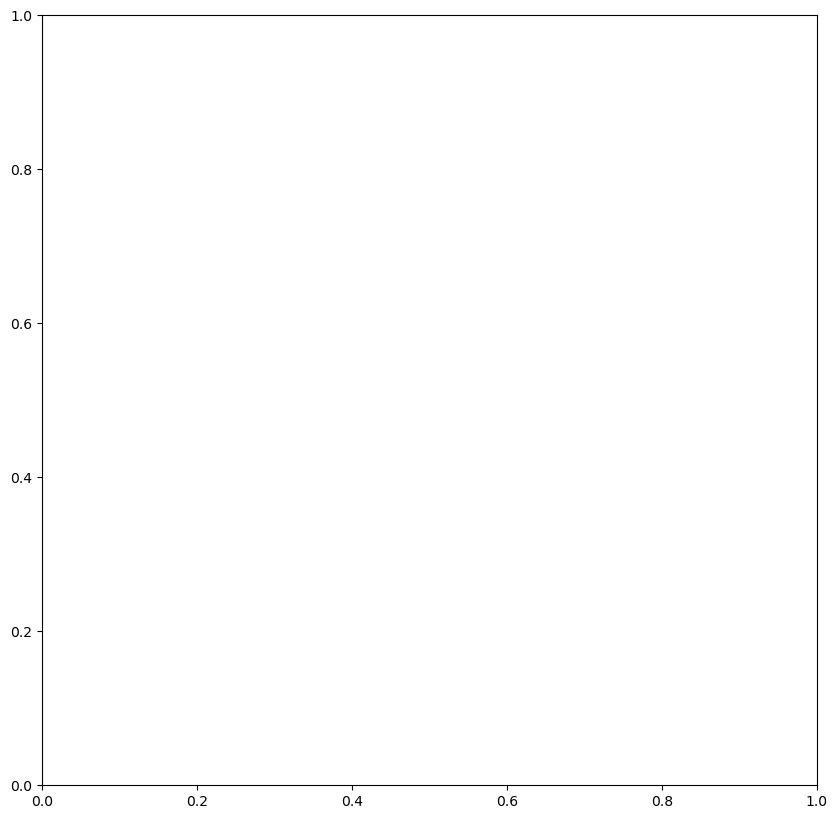

In [5]:
fig,ax=plt.subplots()
ax.ecdf(np.log10(DC_f3l_df['Intensity_Sum_OVA']+5e-1),label='with Flt3 ligand',density=True,alpha=0.5)
# plt.hist(np.log10(DC_crtl_df['Intensity_Sum_OVA']+5e-1),label='control',density=True,alpha=0.5)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('log AF555 signal sum in cell')

Text(0.5, 0, 'log AF555 signal sum in cell')

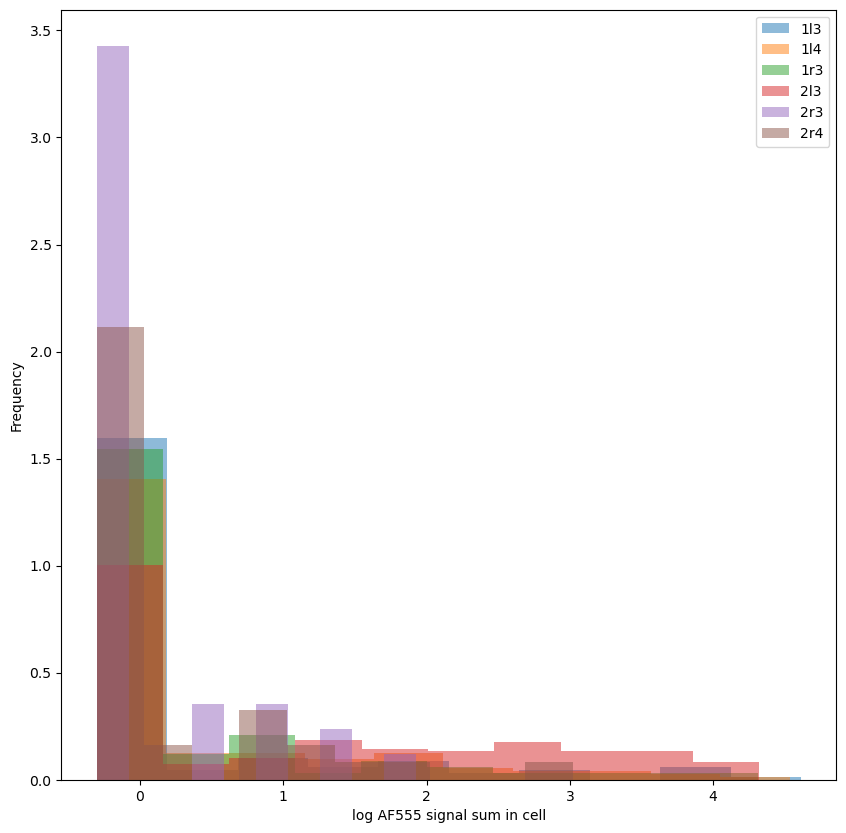

In [4]:
plt.hist(np.log10(DC_1l3_df['Intensity_Sum_OVA']+5e-1),label='1l3',density=True,alpha=0.5)
plt.hist(np.log10(DC_1l4_df['Intensity_Sum_OVA']+5e-1),label='1l4',density=True,alpha=0.5)
plt.hist(np.log10(DC_1r3_df['Intensity_Sum_OVA']+5e-1),label='1r3',density=True,alpha=0.5)
plt.hist(np.log10(DC_2l3_df['Intensity_Sum_OVA']+5e-1),label='2l3',density=True,alpha=0.5)
plt.hist(np.log10(DC_2r3_df['Intensity_Sum_OVA']+5e-1),label='2r3',density=True,alpha=0.5)
plt.hist(np.log10(DC_2r4_df['Intensity_Sum_OVA']+5e-1),label='2r4',density=True,alpha=0.5)
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('log AF555 signal sum in cell')